<a href="https://colab.research.google.com/github/Yash-singh25/Classification-on-Breast-Cancer-/blob/master/Classification_on_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 57kB/s 
     |████████████████████████████████| 450kB 51.8MB/s 
     |████████████████████████████████| 3.8MB 51.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=566a218dc50de284f65be3a3bf2557c72b071fa96bbdcf06d880254ac21be1c3
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: t

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
df = load_breast_cancer()

In [5]:
df

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [0]:
df_target = df.target

In [0]:
df_data = df.data

In [11]:
print(df_target.shape)
print(df_data.shape)

(569,)
(569, 30)


In [0]:
x_train , x_test , y_train , y_test = train_test_split(df_data , df_target , test_size = 0.2 , random_state = 10)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [0]:
from sklearn import preprocessing

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train_normalized = min_max_scaler.fit_transform(x_train)
x_test_normalized = min_max_scaler.fit_transform(x_test)

In [0]:
obj = LogisticRegression()
model = obj.fit(x_train_normalized , y_train)
predicted_train = obj.predict(x_train_normalized)
predicted_test = obj.predict(x_test_normalized)

In [19]:
print('the prediction for train is {}'.format(predicted_train))
print('the prediction for train is {}'.format(predicted_test))

the prediction for train is [0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1
 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1
 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1
 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0
 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 0 1 0 1 0 1 0 1 1 1 0]
the prediction for train is [0 1 1 0 1 1 1 1 0 0

In [20]:
score_train = obj.score(x_train_normalized , y_train)
score_test = obj.score(x_test_normalized , y_test)
print('the score for train is {}'.format(score_train))
print('the score for test is {}'.format(score_test))

the score for train is 0.9648351648351648
the score for test is 0.8947368421052632


In [21]:
r_score_train = r2_score(y_train , predicted_train)
r_score_test = r2_score(y_test , predicted_test)
print('the r-score for train is {}'.format(r_score_train))
print('the r-score for test is {}'.format(r_score_test))

the r-score for train is 0.8507768622145697
the r-score for test is 0.5323076923076923


In [0]:
accuracy_train = accuracy_score(y_train , predicted_train)
accuracy_test = accuracy_score(y_test , predicted_test)

In [158]:
print('the accuracy for train:{}'.format(accuracy_train))
print('the accuracy for test: {}'.format(accuracy_test))

the accuracy for train:0.9648351648351648
the accuracy for test: 0.8947368421052632


In [0]:
classification_report_train = classification_report(y_train , predicted_train)
classification_report_test = classification_report(y_test , predicted_test)

In [23]:
classification_report_train

'              precision    recall  f1-score   support\n\n           0       0.99      0.91      0.95       173\n           1       0.95      1.00      0.97       282\n\n    accuracy                           0.96       455\n   macro avg       0.97      0.95      0.96       455\nweighted avg       0.97      0.96      0.96       455\n'

In [27]:
classification_report_test

'              precision    recall  f1-score   support\n\n           0       0.76      1.00      0.87        39\n           1       1.00      0.84      0.91        75\n\n    accuracy                           0.89       114\n   macro avg       0.88      0.92      0.89       114\nweighted avg       0.92      0.89      0.90       114\n'

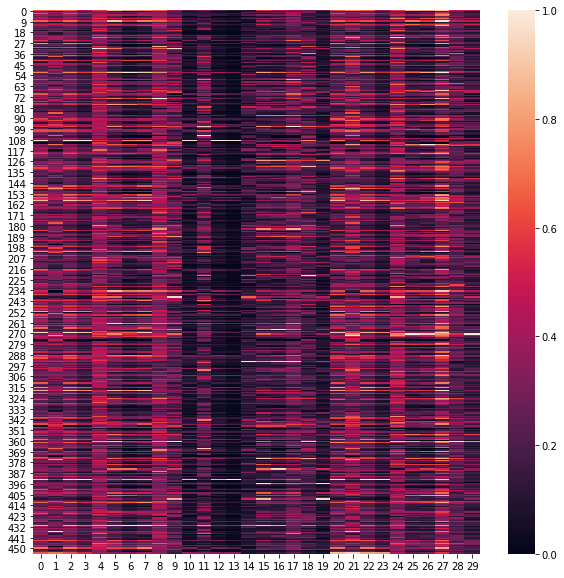

In [117]:
plt.figure(figsize=(10,10))
sns.heatmap(x_train_normalized)

In [29]:
obj.intercept_

array([8.24469704])

In [30]:
obj.coef_

array([[-1.75825738, -1.67226609, -1.71956301, -1.4931355 , -0.43857301,
        -0.30713879, -1.407742  , -1.87140534, -0.38053028,  0.90252564,
        -1.15875513, -0.10042669, -0.88250648, -0.75606094, -0.06753289,
         0.74200982,  0.09923313, -0.5009565 ,  0.49065591,  0.66308341,
        -2.1702157 , -2.20084418, -1.99988724, -1.57482095, -1.37254021,
        -0.73542055, -1.53704123, -2.44631658, -1.11439194, -0.30075343]])

In [36]:
x_train_normalized[:,0].shape

(455,)

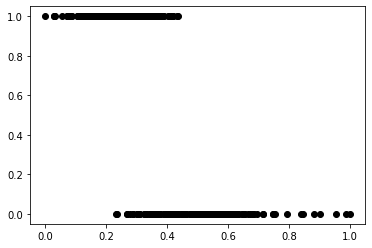

In [44]:
plt.scatter(x_train_normalized[:,2] , predicted_train, color = 'k')

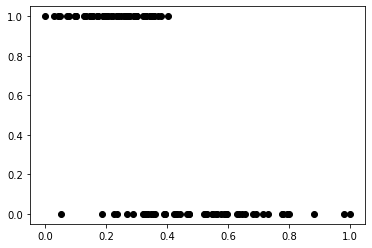

In [45]:
plt.scatter(x_test_normalized[:,0] , predicted_test, color = 'k')

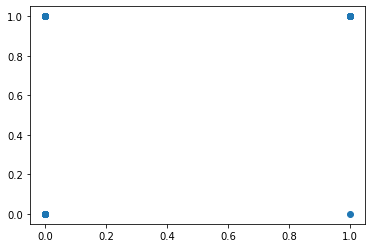

In [159]:
plt.scatter(y_train , predicted_train)

In [0]:
obj.coef_ = obj.coef_.transpose()

In [51]:
obj.coef_.shape

(30, 1)

In [53]:
x_train_normalized.shape

(455, 30)

In [59]:
np.ones([455,]).shape

(455,)

In [87]:
x_train.shape

(455, 30)

In [0]:
J1 = 1/(np.ones([455,])+ np.exp(-1*(min_max_scaler.fit_transform((x_train_normalized[:,2]*obj.coef_[2] + np.ones([455,])*obj.intercept_).reshape(-1,1)))))

In [0]:
K = np.mean(J)*(np.ones([455,]))

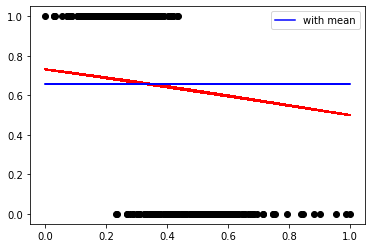

In [189]:
plt.plot(x_train_normalized[:,2] , J1 , color = 'r')
plt.plot(x_train_normalized[:,2] , K , color = 'b' , label = 'with mean')
plt.legend()
plt.scatter(x_train_normalized[:,2] , predicted_train , color = 'k')

In [121]:
names_columns = df.feature_names
names_columns

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

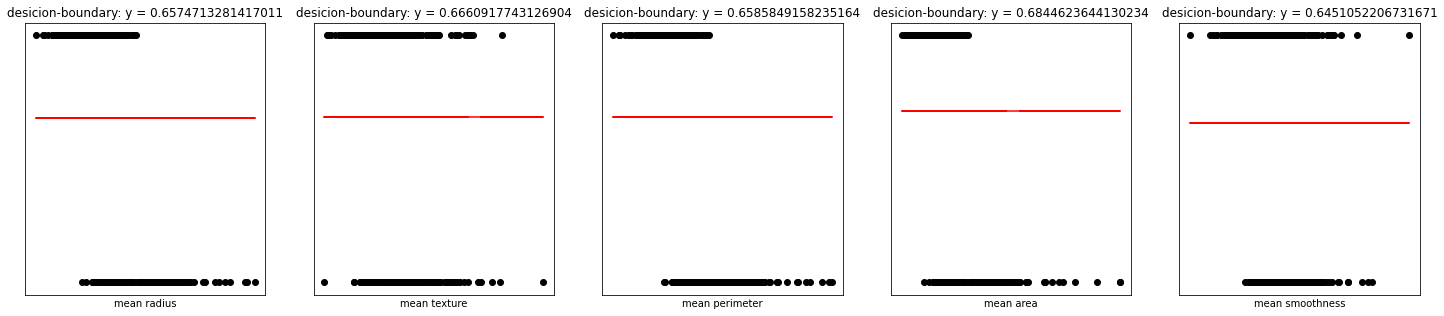

In [151]:
J = []
plt.figure(figsize=(25,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  J = 1/(np.ones([455,])+np.exp(-1*(min_max_scaler.fit_transform((x_train_normalized[:,i]*obj.coef_[i] + np.ones([455,])*obj.intercept_).reshape(-1,1)))))
  K = np.median(J)*(np.ones([455,]))
  plt.plot(x_train_normalized[:,i] , K , color = 'r')
  plt.scatter(x_train_normalized[:,i] , predicted_train , color = 'k')
  plt.xlabel('{}'.format(names_columns[i]))
  plt.title('desicion-boundary: y = {}'.format((np.mean(J))))
plt.show()

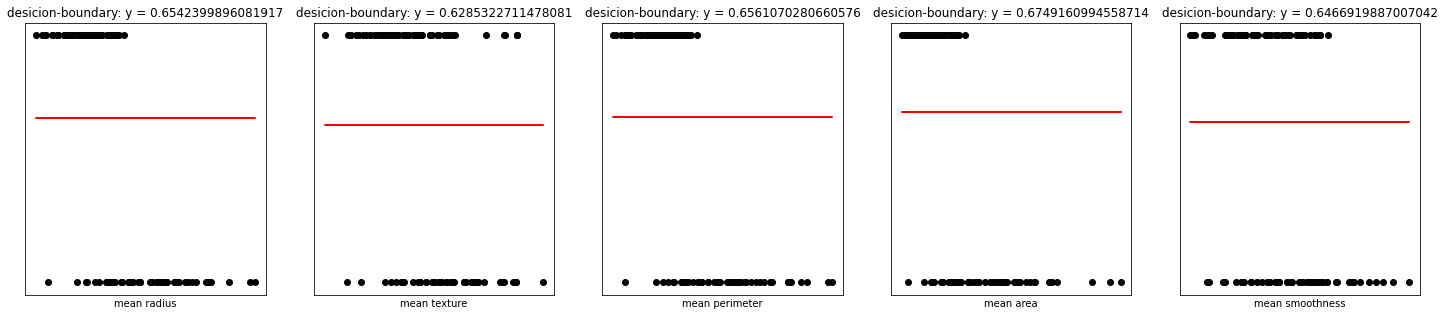

In [155]:
J = []
plt.figure(figsize=(25,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  J = 1/(np.ones([114,])+np.exp(-1*(min_max_scaler.fit_transform((x_test_normalized[:,i]*obj.coef_[i] + np.ones([114,])*obj.intercept_).reshape(-1,1)))))
  K = np.median(J)*(np.ones([114,]))
  plt.plot(x_test_normalized[:,i] , K , color = 'r')
  plt.scatter(x_test_normalized[:,i] , predicted_test , color = 'k')
  plt.xlabel('{}'.format(names_columns[i]))
  plt.title('desicion-boundary: y = {}'.format((np.mean(J))))
plt.show()

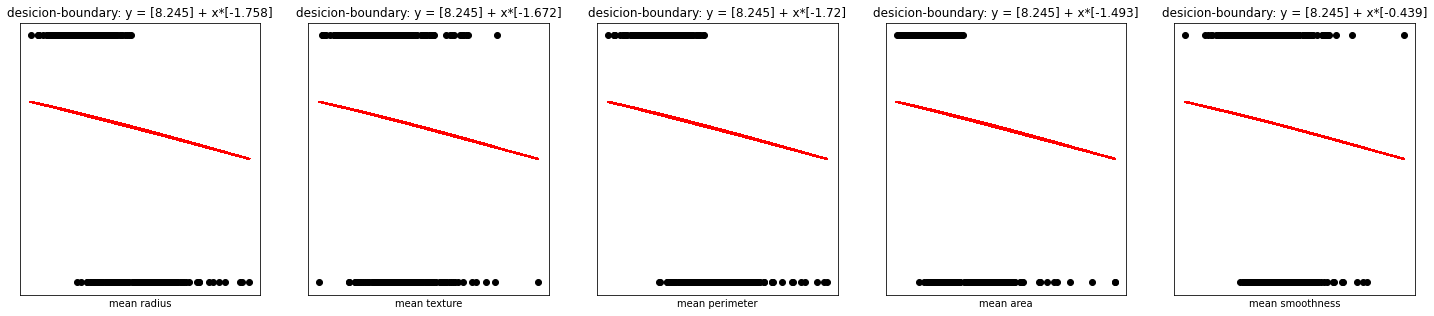

In [173]:

plt.figure(figsize=(25,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  J = 1/(np.ones([455,])+np.exp(-1*(min_max_scaler.fit_transform((x_train_normalized[:,i]*obj.coef_[i] + np.ones([455,])*obj.intercept_).reshape(-1,1)))))
 
  plt.plot(x_train_normalized[:,i] , J , color = 'r')
  plt.scatter(x_train_normalized[:,i] , predicted_train , color = 'k')
  plt.xlabel('{}'.format(names_columns[i]))
  plt.title('desicion-boundary: y = {} + x*{}'.format(np.round(obj.intercept_ ,3),np.round(obj.coef_[i] , 3)))
plt.show()

In [0]:
J = 1/(np.ones([455,])+np.exp(-1*(min_max_scaler.fit_transform((x_train_normalized[:,1]*obj.coef_[1] + np.ones([455,])*obj.intercept_).reshape(-1,1)))))

In [149]:
J

array([[0.5852324 , 0.5852324 , 0.5852324 , ..., 0.5852324 , 0.5852324 ,
        0.5852324 ],
       [0.7109495 , 0.7109495 , 0.7109495 , ..., 0.7109495 , 0.7109495 ,
        0.7109495 ],
       [0.63913835, 0.63913835, 0.63913835, ..., 0.63913835, 0.63913835,
        0.63913835],
       ...,
       [0.71800801, 0.71800801, 0.71800801, ..., 0.71800801, 0.71800801,
        0.71800801],
       [0.68214953, 0.68214953, 0.68214953, ..., 0.68214953, 0.68214953,
        0.68214953],
       [0.57012298, 0.57012298, 0.57012298, ..., 0.57012298, 0.57012298,
        0.57012298]])

In [143]:
min_max_scaler.fit_transform((x_train_normalized[:,1]*obj.coef_[1] + np.ones([455,])*obj.intercept_).reshape(-1,1))[0]

array([0.34429066])

In [147]:
1/(1+np.exp(-1*(0.34429066)))

0.5852323975900847